In [1]:
from segment_anything import SamPredictor, sam_model_registry
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

In [28]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    
def getImage(image,resize=-1):
    cmap = matplotlib.colormaps["viridis"]
    norm = plt.Normalize(image.min(), image.max())
    rgba_image = cmap(norm(image))
    rgb_image = np.array(rgba_image[:, :, :3])
    rgb_array_scaled = (rgb_image * 255).astype(np.uint8)
    if resize==-1:
        return rgb_array_scaled
    image_pil = Image.fromarray(rgb_array_scaled)
    new_size = resize
    resized_image_pil = image_pil.resize(new_size, Image.LANCZOS)
    return np.array(resized_image_pil)
def show(image):
    plt.figure()
    plt.axis("off")
    plt.imshow(image)
    plt.show()

def to_origin(mask):
    mask_img=Image.fromarray(mask)
    mask_img=mask_img.resize((401,31),Image.LANCZOS)
    mask_img=np.array(mask_img)
    return mask_img

def display_result(image, mask):
    plt.figure()
    plt.imshow(image)
    # show_box(input_box, plt.gca())
    show_mask(mask, plt.gca())
    # show_points(input_point, input_label, plt.gca())
    # plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    # plt.savefig(f"./outputs/res{i}.jpg")
    plt.show()

    

In [3]:
dist=np.load("/home/wzy/segment-anything/data/newd.npy")
print(dist.shape)

(10, 1001, 31, 401)


In [5]:
sam = sam_model_registry["vit_h"](checkpoint="/home/wzy/segment-anything/checkpoints/sam_vit_h_4b8939.pth")
sam.to(device="cuda")
predictor = SamPredictor(sam)

mask_generator = SamAutomaticMaskGenerator(sam)

(1, 256, 256)


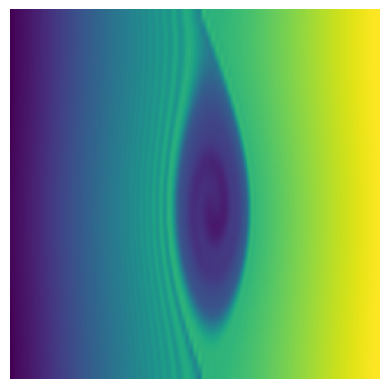

In [6]:
image=dist[8,600,:,:]
image=getImage(image,(256,256))
plt.axis("off")
plt.imshow(image)
# image = cv2.imread(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

predictor.set_image(image)
input_box = np.array([64,64,192,192])
input_point = np.array([[128, 128]])
input_label = np.array([1]) # 前景与背景
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    # box=input_box[None, :],
    multimask_output=False,
)
print(masks.shape) # (number_of_masks) x H x W

(1, 256, 256)
0
64.0


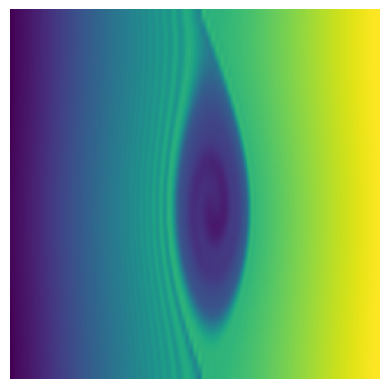

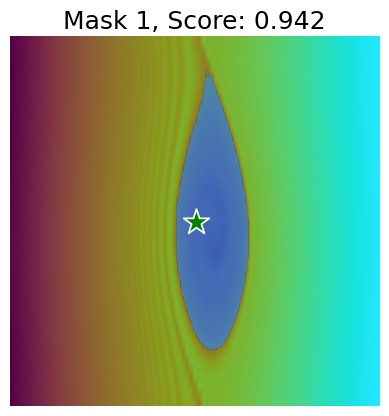

In [31]:
image=dist[8,600,:,:]
image=getImage(image,(256,256))
plt.axis("off")
plt.imshow(image)
# image = cv2.imread(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

predictor.set_image(image)
input_box = np.array([64,64,192,192])
input_point = np.array([[128, 128]])
input_label = np.array([1]) # 前景与背景
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    # box=input_box[None, :],
    multimask_output=False,
)
print(masks.shape) # (number_of_masks) x H x W
for i, (mask, score) in enumerate(zip(masks, scores)):
    print(np.sum(mask[:,-3:-1]) + np.sum(mask[:,0:2])+np.sum(mask[-3:-1,:])+np.sum(mask[0:2,:]))
    print((mask.shape[0]+mask.shape[1])/8)
    if np.sum(mask[:,-3:-1]) + np.sum(mask[:,0:2])+np.sum(mask[-3:-1,:])+np.sum(mask[0:2,:])\
        >(mask.shape[0]+mask.shape[1])/8 or score<0.9:
        
        print("false")
    plt.figure()
    plt.imshow(image)
    # show_box(input_box, plt.gca())
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    # plt.savefig(f"./outputs/res{i}.jpg")
    plt.show()



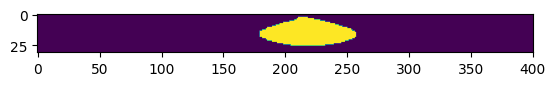

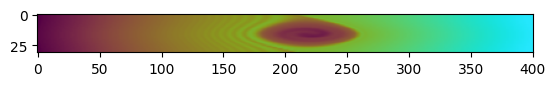

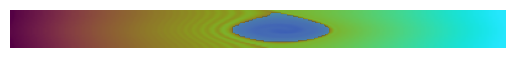

In [32]:
mask_img=to_origin(mask)
plt.imshow(mask_img)
plt.show()
img=to_origin(image)
plt.imshow(img)
plt.show()
display_result(img,mask_img)

In [37]:
image[0][:5]

array([[84,  1, 68],
       [84,  1, 68],
       [88,  4, 68],
       [91,  8, 69],
       [91,  8, 70]], dtype=uint8)

In [38]:
img[0][:5]

array([[84,  1, 68],
       [84,  1, 68],
       [84,  1, 68],
       [87,  3, 68],
       [90,  6, 68]], dtype=uint8)

In [ ]:
masks = mask_generator.generate(image)

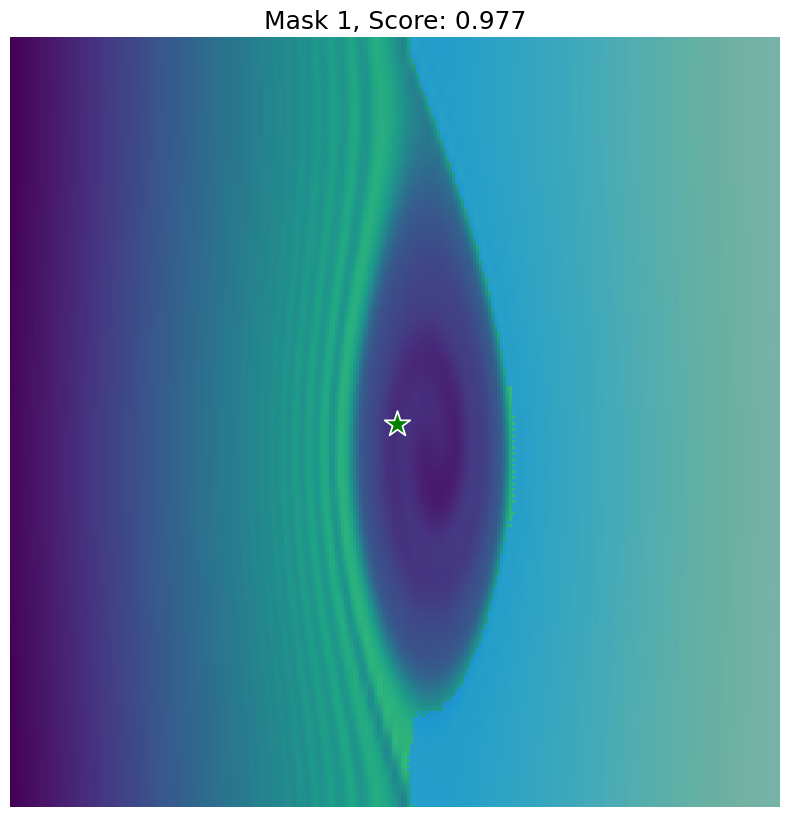

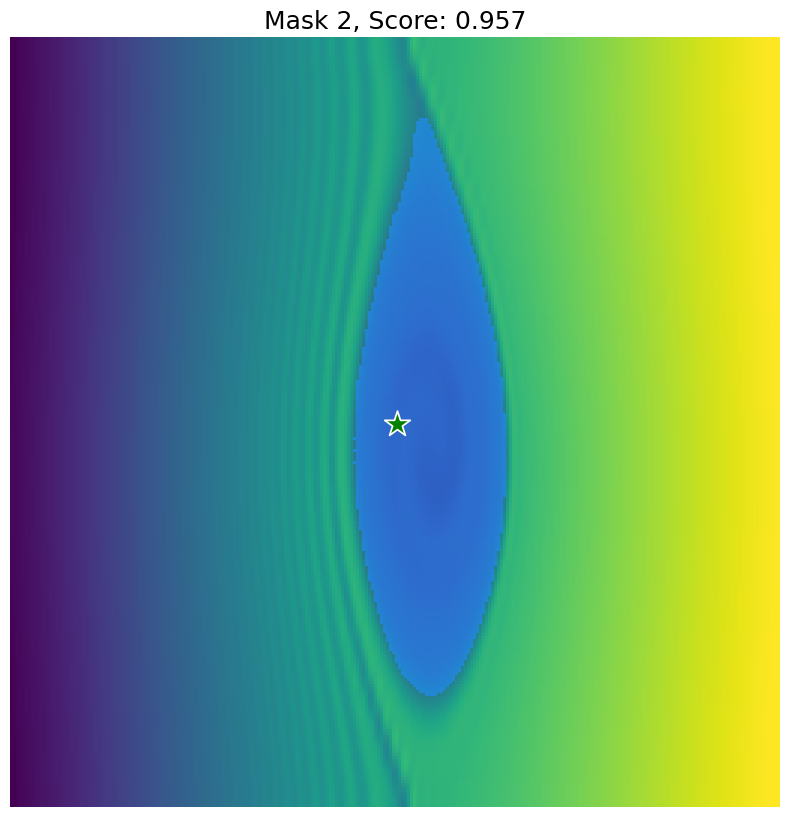

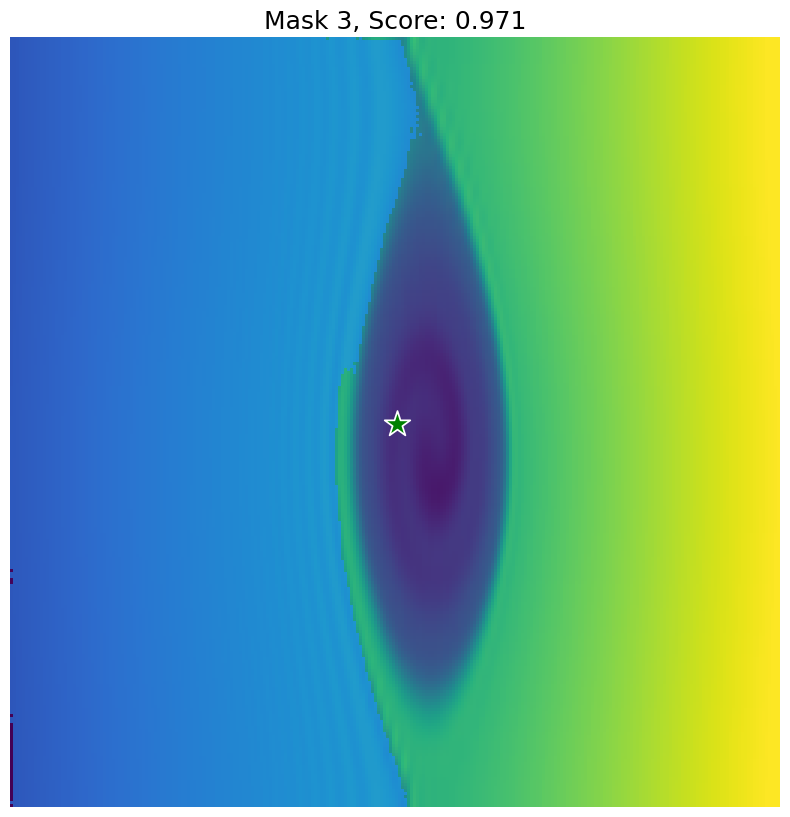

In [ ]:
for i, info in enumerate(masks):
    mask=info["segmentation"]
    score=info["stability_score"]
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    # plt.savefig(f"./outputs/res{i}.jpg")
    plt.show()

In [1]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    mask=mask.astype(np.uint8)
    print(mask)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # 逼近轮廓
    ellipse = None
    for cnt in contours:
        # 使用椭圆拟合
        if len(cnt) >= 5:
            ellipse = cv2.fitEllipse(cnt)
            cv2.drawContours(image, [cnt], -1, (0, 255, 0), 2)

    # 判断是否为椭圆形
    if ellipse is not None:
        print("找到椭圆形")
        center, axis, angle = ellipse
        print(f"中心点：{center}, 轴长：{axis}, 角度：{angle}")
    else:
        print("未找到椭圆形")
cv2.imshow('Contours Image', image)


NameError: name 'masks' is not defined

In [84]:
import cv2
import numpy as np

# 假设 mask 是你的二值化 mask，这里使用随机生成的 100x100 的数组作为示例
mask = np.zeros((100, 100), dtype=np.uint8)
cv2.ellipse(mask, (50, 50), (30, 20), 0, 0, 360, 255, -1)  # 生成一个椭圆形的 mask，你可以替换为你的 mask
print(type(mask))
print(mask.shape)
# 寻找轮廓
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 逼近轮廓
ellipse = None
for cnt in contours:
    # 使用椭圆拟合
    if len(cnt) >= 5:
        ellipse = cv2.fitEllipse(cnt)

# 判断是否为椭圆形
if ellipse is not None:
    print("找到椭圆形")
    center, axis, angle = ellipse
    print(f"中心点：{center}, 轴长：{axis}, 角度：{angle}")
else:
    print("未找到椭圆形")


<class 'numpy.ndarray'>
(100, 100)
找到椭圆形
中心点：(49.97462844848633, 50.008426666259766), 轴长：(39.91545867919922, 60.04452896118164), 角度：89.99999237060547
